In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Training Datagen
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
# Testing Datagen
test_datagen = ImageDataGenerator(rescale=1/255)


In [4]:
# Training Dataset
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/College/IBM/Dataset/training_set',target_size=(64,64), class_mode='categorical',batch_size=900)
# Testing Dataset
x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/College/IBM/Dataset/test_set',target_size=(64,64), class_mode='categorical',batch_size=900)


Found 15750 images belonging to 9 classes.
Found 2250 images belonging to 9 classes.


In [5]:
print("Len x-train : ", len(x_train))
print("Len x-test : ", len(x_test))

Len x-train :  18
Len x-test :  3


In [6]:
# The Class Indices in Training Dataset
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout

In [8]:
model=Sequential()

In [9]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Flatten())

In [12]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(9,activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
18/18 [==============================] - 2953s 164s/step - loss: 0.9247 - accuracy: 0.6886 - val_loss: 0.3260 - val_accuracy: 0.9169
Epoch 2/10
18/18 [==============================] - 57s 3s/step - loss: 0.1810 - accuracy: 0.9498 - val_loss: 0.3152 - val_accuracy: 0.9356
Epoch 3/10
18/18 [==============================] - 58s 3s/step - loss: 0.0663 - accuracy: 0.9809 - val_loss: 0.3017 - val_accuracy: 0.9693
Epoch 4/10
18/18 [==============================] - 57s 3s/step - loss: 0.0323 - accuracy: 0.9921 - val_loss: 0.3410 - val_accuracy: 0.9698
Epoch 5/10
18/18 [==============================] - 56s 3s/step - loss: 0.0200 - accuracy: 0.9950 - val_loss: 0.3621 - val_accuracy: 0.9729
Epoch 6/10
18/18 [==============================] - 57s 3s/step - loss: 0.0129 - accuracy: 0.9966 - val_loss: 0.3656 - val_accuracy: 0.9724
Epoch 7/10
18/18 [==============================] - 57s 3s/step - loss: 0.0096 - accuracy: 0.9979 - val_loss: 0.4155 - val_accuracy: 0.9738
Epoch 8/10
18/18

In [15]:
model.save('aslpng1.h5')

In [17]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [19]:
model=load_model('aslpng1.h5')
img=image.load_img(r'/content/drive/MyDrive/College/IBM/Dataset/test_set/D/2.png',
                   target_size=(64,64))

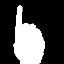

In [20]:
img

In [21]:
x=image.img_to_array(img)

In [22]:
x.ndim

3

In [23]:
x=np.expand_dims(x,axis=0)

In [24]:
x.ndim

4

In [25]:
pred=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 84ms/step


In [26]:
pred

array([3])

In [27]:
index=['A','B','C','D','E','F','G','H','I']
print(index[pred[0]])

D


In [28]:
import cv2

In [29]:
img=cv2.imread(r'/content/drive/MyDrive/College/IBM/Dataset/test_set/C/2.png',1)

In [30]:
img1=cv2.imread(r'/content/drive/MyDrive/College/IBM/Dataset/test_set/B/2.png',0)

In [31]:
print(img.shape)

(64, 64, 3)


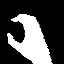

In [32]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()